<h1> Time Series Challenge!

You will be working with lightening data and graphing time series. <br/> <font color='blue'>1. Import any libraries you might need. 

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
import xarray as xr
import os
import scipy
import pandas as pd
import matplotlib.colors
from matplotlib import cm
import netCDF4
from netCDF4 import Dataset

The data file is named lightening_2019.csv

<font color='blue'> <br/> 2. Read in the data. Here you can use numpy arrays or panda dataframes. 

In [11]:
lightening=pd.read_csv('lightening_2019.csv')
time=np.asarray(lightening['date'])
lightening_count=np.asarray(lightening['number'])

<font color='blue'> 3. Figure out what each column contains

In [9]:
lightening

,date,lat,lon,number
0,20190101,-83.4,36.3,1
1,20190101,-88.5,29.0,2
2,20190101,-87.2,32.0,1
3,20190101,-84.2,35.0,1
4,20190101,-83.6,35.0,1
...,...,...,...,...
3073230,20191231,-63.0,40.1,1
3073231,20191231,-63.2,40.1,1
3073232,20191231,-63.0,40.2,1
3073233,20191231,-64.2,40.2,1


<font color='blue'> 4. You will notice that each row is a date and a location that has a certain count of lightening strikes. We want to know how many strikes happen per day, no matter where they occur. Use your epic new coding skills to create this dataset. 

In [45]:
##This can be done many ways so don't worry if yours looks different!

#initialize a np array that you will use to store data
final_count_data=np.array([0,0])
new_data=[0,0]

#loop through each row of original data
for i in range(len(lightening_count)-1):
    #if the time in the i position is the same as the time int he i+1 position, we want to have a
    #new row of data with the data and the two counts of lightening added together
    if (time[i]==time[i+1]):
        new_data=[time[i],new_data[1]+lightening_count[i+1]]
    #if the two dates are not the same, we want to add the data from the old date to out 
    #new data storage, and we want to then make the new data reflect the new data and the initial 
    #lightening count from that date
    else:
        final_count_data=np.vstack((final_count_data,new_data))
        new_data=[time[i+1],lightening_count[i+1]]

#For the last day, we need to make sure        
final_count_data=np.vstack((final_count_data,new_data))
final_count_data=np.delete(final_count_data,0,0)


<font color='blue'>5. You know should a time series of dates with total lightening strikes for each day. Graph this time series and make it beautiful! Experiment with:
* <font color='blue'>Formatting the dates nicely on the x-axis
* <font color='blue'>Making sure the x and y axes have readable labels and titles
* <font color='blue'>Labeling the months along the x axis instead of days


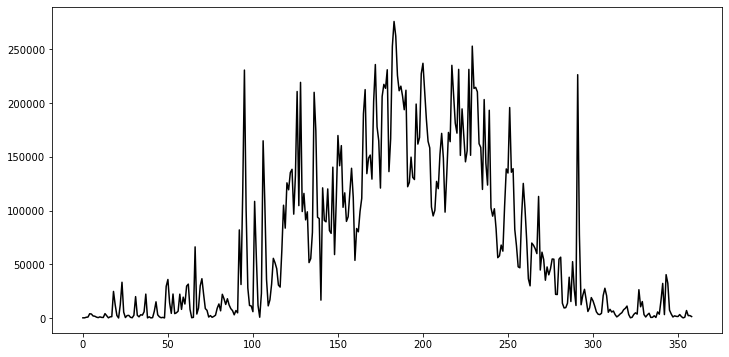

In [79]:
#Create the figure
fig=plt.figure(figsize=(12,6))
#add one subplot to figure
ax= fig.add_subplot(1, 1, 1)

#name and plot time on the x axis, wind on the y
time=np.linspace(0,358,359)
wind=final_count_data[:,1].astype('float64')

plt.plot(time, wind,color='black')

plt.show()

<font color='red'> 6. We have now seen the time series of total number of lightening strikes per day.
<br/> Based on the latitude and longitude in each row of the original data, try to make a spatial map to visualize that data.